In [51]:
import pandas as pd
import csv
import plotly
#MAPPER

mapper = open("mapper.txt", "w")
k = 1
for j in range(3):
    df = pd.read_csv("Visualization.csv",skiprows=[i for i in range(1,k)], nrows=12)
    df1 = df[['A1','A2','A3','hour']]
    df2 = df1.groupby(['hour']).sum().reset_index()
    df2.to_csv('AREA_TRAFFIC.csv')
    with open('AREA_TRAFFIC.csv', 'r') as f:
        csvreader = csv.reader(f)
        next(csvreader)
        for row in csvreader:
            cnt1 = int(row[2])
            cnt2 = int(row[3])
            cnt3 = int(row[4])
            mapper.write("A1"+"\t"+row[2]+"\t")
            mapper.write("A2"+"\t"+row[3]+"\t")
            mapper.write("A3"+"\t"+row[4]+"\t")
    k = k + 12
mapper.close()
df2

,hour,A1,A2,A3
0,2,64,23,24


In [52]:
#REDUCER
bar_chart = open("vehicle_per_2_hours.csv", "w")
bar_chart.write("year,value"+"\n")

reducer = open("reducer.txt", "w")
red = open('mapper.txt', 'r') 
Lines = red.readlines() 
for l in Lines:
    l2 = l.split('\t')
a1_count = 0
a2_count = 0
a3_count = 0
for i in range(len(l2)):
    if(l2[i] == 'A1'):
        a1_count = a1_count + int(l2[i+1])
    if(l2[i] == 'A2'):
        a2_count = a2_count + int(l2[i+1])
    if(l2[i] == 'A3'):
        a3_count = a3_count + int(l2[i+1])
reducer.write("A1"+"\t"+str(a1_count)+"\n")
reducer.write("A2"+"\t"+str(a2_count)+"\n")
reducer.write("A3"+"\t"+str(a3_count)+"\n")
bar_chart.write("A1,"+str(a1_count))
bar_chart.write("\n")
bar_chart.write("A2,"+str(a2_count))
bar_chart.write("\n")
bar_chart.write("A3,"+str(a3_count))
bar_chart.close()
reducer.close()

In [6]:
from fbprophet import Prophet

In [9]:
df = pd.read_csv("Visualization.csv")
df1 = df[['Date','A1']]
df1.rename(columns = {'Date':'ds','A1':'y'}, inplace = True) 
df1

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,12
2,2015-10-04 00:10:00,4
3,2015-10-04 00:15:00,9
4,2015-10-04 00:20:00,5
...,...,...
26491,2016-01-03 23:35:00,5
26492,2016-01-03 23:40:00,9
26493,2016-01-03 23:45:00,7
26494,2016-01-03 23:50:00,13


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


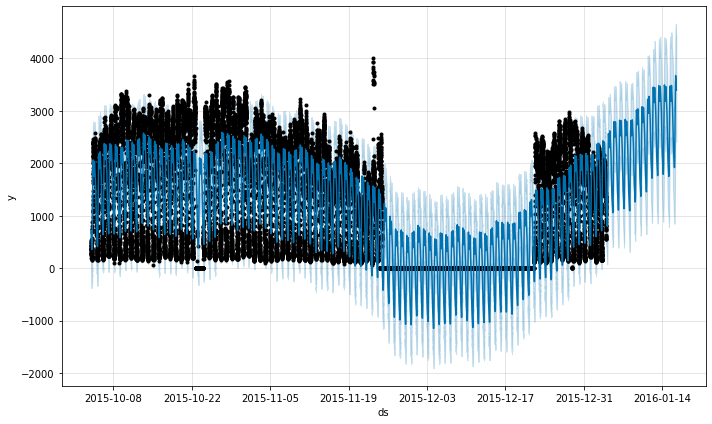

In [15]:
m = Prophet().fit(df4)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [23]:
from IPython.core.display import HTML

In [50]:
HTML('''
    <!DOCTYPE html>
<html>
<head>
    <style>
        .arc text {
            font: 10px sans-serif;
            text-anchor: middle;
        }

        .arc path {
            stroke: #fff;
        }

        .title {
            fill: teal;
            font-weight: bold;
        }
    </style>
    <script src="https://d3js.org/d3.v4.min.js"></script>
</head>
<body>
    <svg width="500" height="400"></svg>
    <script>

        var svg = d3.select("svg"),
            width = svg.attr("width"),
            height = svg.attr("height"),
            radius = Math.min(width, height) / 2;
        
        var g = svg.append("g")
                   .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

        var color = d3.scaleOrdinal(['#4daf4a','#377eb8','#ff7f00','#984ea3','#e41a1c']);

        var pie = d3.pie().value(function(d) { 
                return d.percent; 
            });

        var path = d3.arc()
                     .outerRadius(radius - 10)
                     .innerRadius(0);

        var label = d3.arc()
                      .outerRadius(radius)
                      .innerRadius(radius - 80);

        d3.csv("browseruse.csv", function(error, data) {
            if (error) {
                throw error;
            }
            var arc = g.selectAll(".arc")
                       .data(pie(data))
                       .enter().append("g")
                       .attr("class", "arc");

            arc.append("path")
               .attr("d", path)
               .attr("fill", function(d) { return color(d.data.browser); });
        
            console.log(arc)
        
            arc.append("text")
               .attr("transform", function(d) { 
                        return "translate(" + label.centroid(d) + ")"; 
                })
               .text(function(d) { return d.data.browser; });
            });

            svg.append("g")
               .attr("transform", "translate(" + (width / 2 - 120) + "," + 20 + ")")
               .append("text")
               .text("Browser use statistics - Jan 2017")
               .attr("class", "title")
    </script>
</body>
</html>
        ''')